In [1]:
# prompt: I am going to implement a neural network for MNIST classification using pytorch import all necessary libraries for me

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


In [42]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform = transforms.ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform = transforms.ToTensor(),
    download = True
)

In [4]:
print(train_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [8]:
train_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
from torch.utils.data import DataLoader

In [11]:
loader = {'train':
          DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
          'test':DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1),
          }

In [25]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = nn.Conv2d(10,20,kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320,50)
    self.fc2 = nn.Linear(50,10)

  def forward(self,x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x= x.view(-1,320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x,training = self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvNet().to(device)
optimizer = optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [27]:
def train(epoch):
  model.train()
  for batch_idx ,(data,target) in enumerate(loader['train']):
    data,target = data.to(device),target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f"Train epoch {epoch} is {batch_idx * len(data) / len(loader['train'].dataset)} ({100 * batch_idx / len(loader['train']):.0f}%)")

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loader['test'].dataset)
    print(f'\nTest set loss: {test_loss:.4f}, Accuracy: {correct}/{len(loader["test"].dataset)} ({100. * correct / len(loader["test"].dataset):.0f}%)\n')


In [28]:
for epoch in range(1,11):
  train(epoch)
  test()

<ipython-input-25-e7bce59d0030>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train epoch 1 is 0.0 (0%)
Train epoch 1 is 0.03333333333333333 (3%)
Train epoch 1 is 0.06666666666666667 (7%)
Train epoch 1 is 0.1 (10%)
Train epoch 1 is 0.13333333333333333 (13%)
Train epoch 1 is 0.16666666666666666 (17%)
Train epoch 1 is 0.2 (20%)
Train epoch 1 is 0.23333333333333334 (23%)
Train epoch 1 is 0.26666666666666666 (27%)
Train epoch 1 is 0.3 (30%)
Train epoch 1 is 0.3333333333333333 (33%)
Train epoch 1 is 0.36666666666666664 (37%)
Train epoch 1 is 0.4 (40%)
Train epoch 1 is 0.43333333333333335 (43%)
Train epoch 1 is 0.4666666666666667 (47%)
Train epoch 1 is 0.5 (50%)
Train epoch 1 is 0.5333333333333333 (53%)
Train epoch 1 is 0.5666666666666667 (57%)
Train epoch 1 is 0.6 (60%)
Train epoch 1 is 0.6333333333333333 (63%)
Train epoch 1 is 0.6666666666666666 (67%)
Train epoch 1 is 0.7 (70%)
Train epoch 1 is 0.7333333333333333 (73%)
Train epoch 1 is 0.7666666666666667 (77%)
Train epoch 1 is 0.8 (80%)
Train epoch 1 is 0.8333333333333334 (83%)
Train epoch 1 is 0.8666666666666667 (8

<ipython-input-25-e7bce59d0030>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction:  2


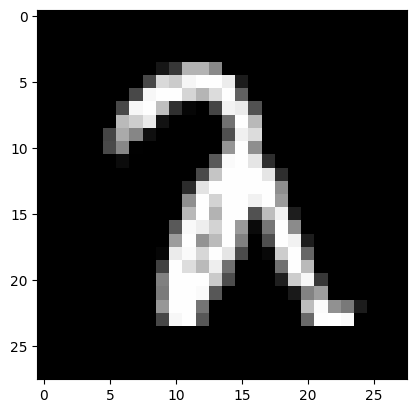

In [45]:
import matplotlib.pyplot as plt
model.eval()
data,target = test_data[1551]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1,keepdim=True).item()
print("Prediction: ",prediction)
image  = data.squeeze().cpu().numpy()
plt.imshow(image,cmap='gray')
plt.show()

In [48]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi